# Exercise 6 
Given a dataset that contains customer information (such as Age, Income, and Spending Score), perform K-means clustering to group customers into clusters. Use visualization chart, plot the data before and after grouping. Also, use the Elbow Method to determine the optimal number of clusters.

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [87]:
df = pd.read_csv("income_clustering.csv")

df = df[["Age", "Income($)"]]

scaler = StandardScaler()
sc_df = scaler.fit_transform(df[['Age', 'Income($)']])

Text(0, 0.5, 'Income')

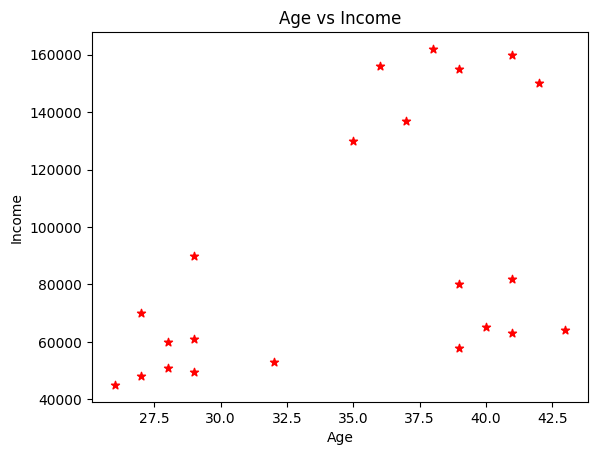

In [88]:
plt.scatter(df["Age"], df["Income($)"], color="r", marker="*")
plt.title("Age vs Income")
plt.xlabel("Age")
plt.ylabel("Income")

In [89]:
k_range = range(1, 11)
sse = []
for k in k_range:
    kmn = KMeans(n_clusters=k)
    kmn.fit(sc_df)
    sse.append(kmn.inertia_)

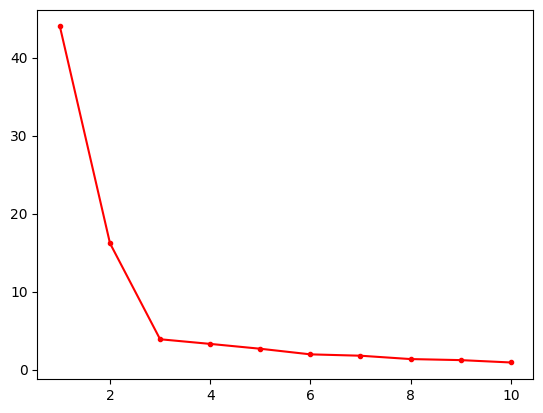

In [90]:
plt.plot(k_range, sse, color="r", marker=".")

In [91]:
kmn = KMeans(n_clusters=3)
clusters = kmn.fit_predict(sc_df)

In [92]:
df['clusters'] = clusters
df.head()

,Age,Income($),clusters
0,27,70000,0
1,29,90000,0
2,29,61000,0
3,28,60000,0
4,42,150000,2


In [93]:
cl1 = df[df['clusters'] == 0]
cl2 = df[df['clusters'] == 1]
cl3 = df[df['clusters'] == 2]
kmn.cluster_centers_

array([[-1.1247901 , -0.74862223],
       [ 0.98550535, -0.51205261],
       [ 0.60143983,  1.40141653]])

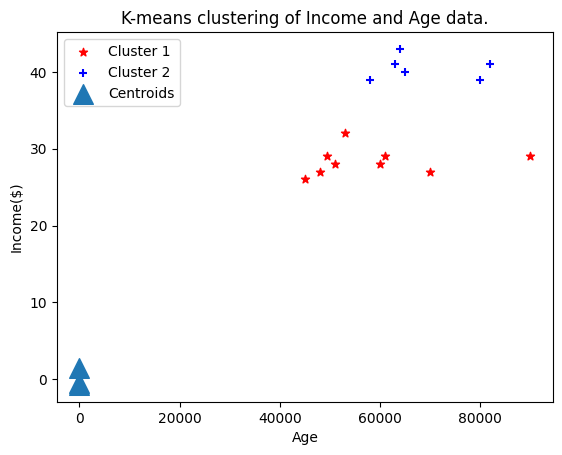

In [94]:
plt.title("K-means clustering of Income and Age data.")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(cl1['Income($)'], cl1['Age'], color="r", marker="*", label="Cluster 1")
plt.scatter(cl2['Income($)'], cl2['Age'], color="b", marker="+", label="Cluster 2")
plt.scatter(kmn.cluster_centers_[:, 0],kmn.cluster_centers_[:, 1], label="Centroids", s=200, marker="^")
plt.legend()